# Credit Risk Classification

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.utils import estimator_html_repr
from IPython.core.display import HTML
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')  #just to ignore warnings related to graphs and other codes.

<b> Importing the dataset

In [6]:
df = pd.read_csv('Credit Risk.csv', index_col='Loan_ID') #As Loan_ID is unique for all the rows, setting it to be the index 
                                                        # will help us for not to drop that column.

In [7]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### EDA (Exploratory Data Analysis)

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [11]:
df.isna().sum()    #We can see there is some missing values for columns.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='Loan_ID'>

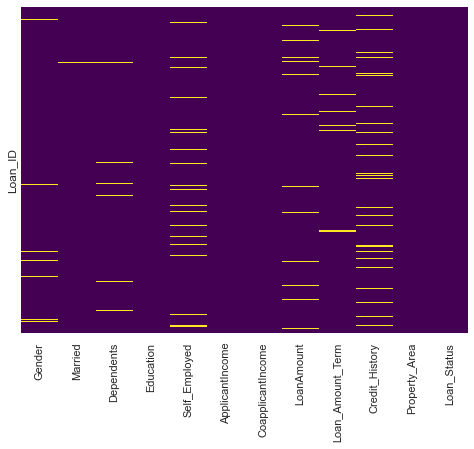

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


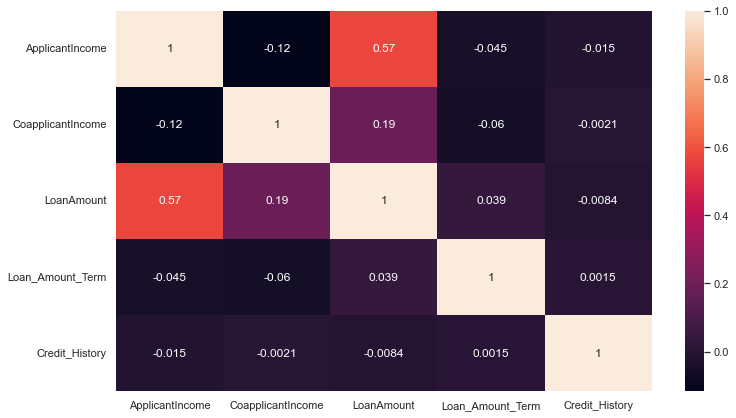

In [15]:
x = df.corr()
fig = plt.figure(figsize=(12,7))
ax = sns.heatmap(x,annot=True) 
# We can see there is almost no strong correlation between columns, except ApplicantIncome and LoanAmount

Wall time: 3.98 s


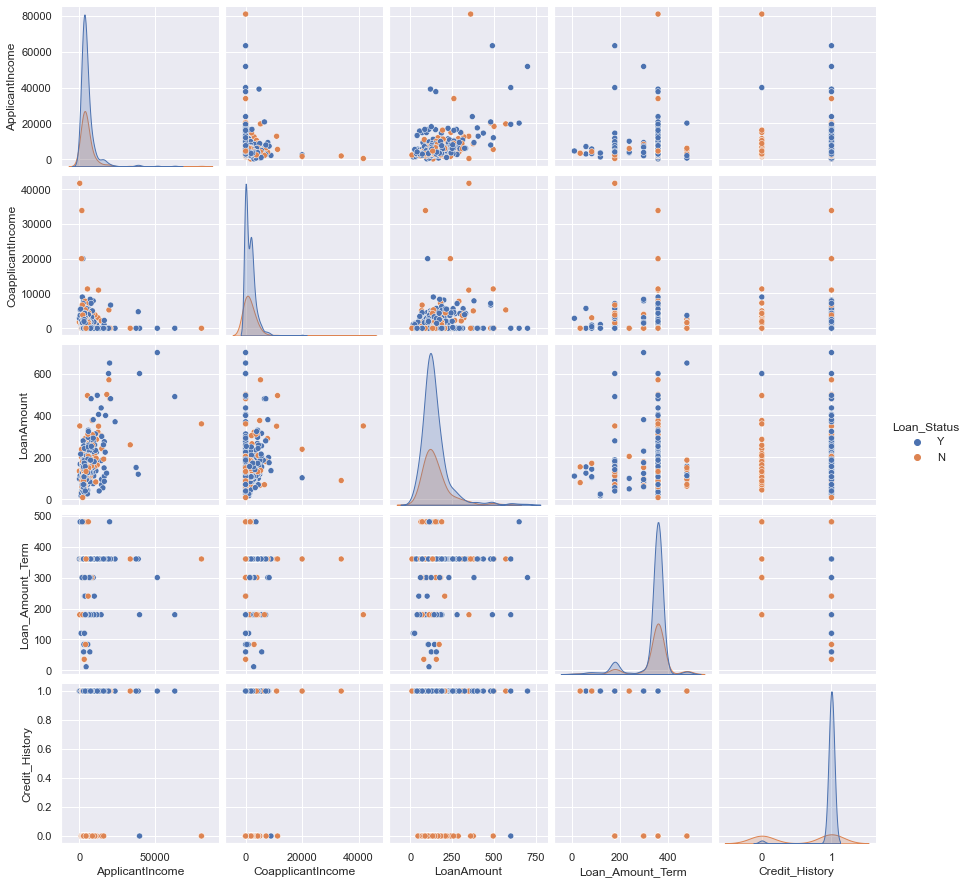

In [16]:
%%time
sns.pairplot(df, hue='Loan_Status')

<AxesSubplot:xlabel='LoanAmount'>

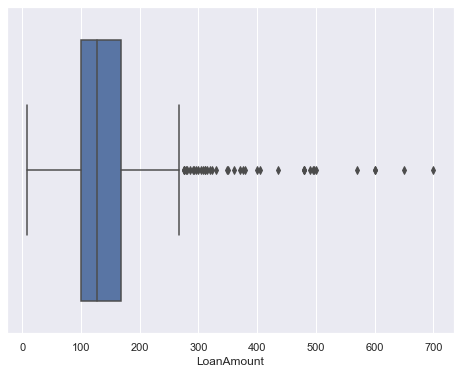

In [17]:
sns.boxplot(df['LoanAmount'])

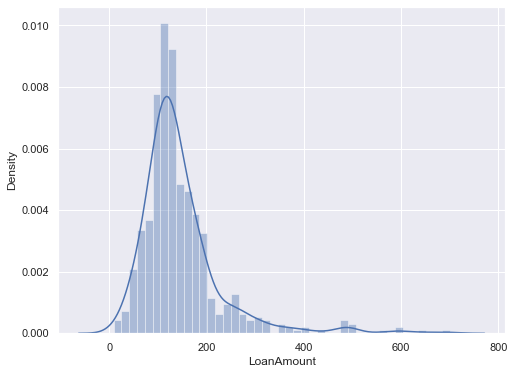

In [18]:
sns.distplot(df['LoanAmount'])
plt.show()                 #We can see there is some outliers in the LoanAmount column, with this information I will use 
            # median strategy while implementing Missing Value Imputation. Same applies to ApplicantIncome and Coapplicantincome

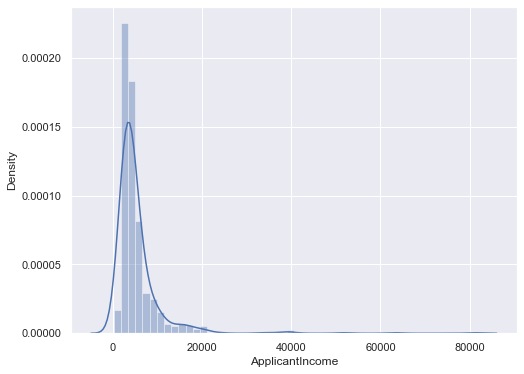

In [19]:
sns.distplot(df['ApplicantIncome'])
plt.show()


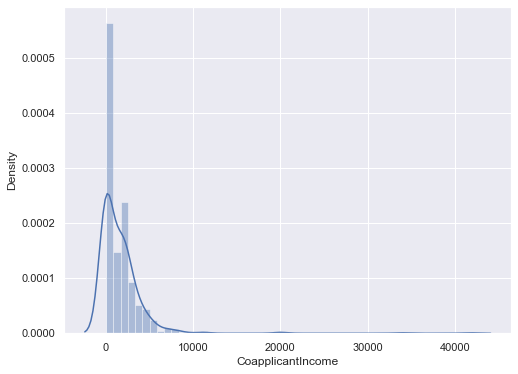

In [20]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

#### To work with outliers, I will try to implement Outlier Detection method (Isolation Forest Method) to the X_train data.

In [21]:
df['LoanAmount'].median() #Median seems quite less than the mean, so median strategy is ok.

128.0

In [22]:
df['LoanAmount'].mean()  # We can see the mean is very well affected by the LoanAmount.

146.41216216216216

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

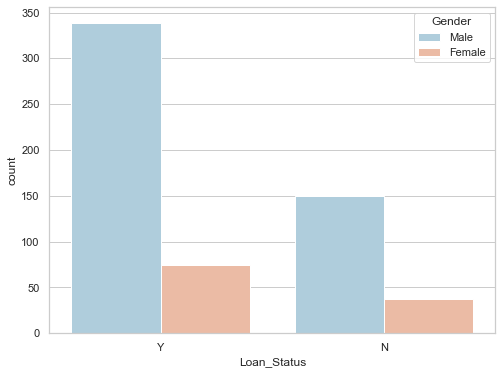

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status",hue='Gender', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

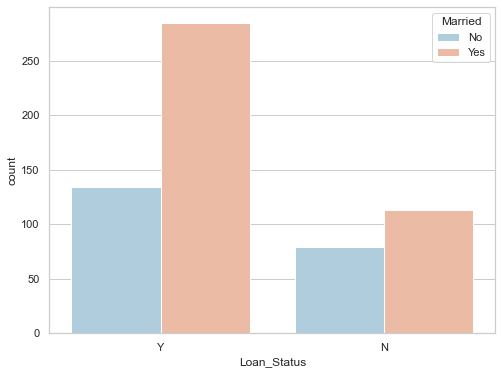

In [24]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status",hue='Married', data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Education', ylabel='count'>

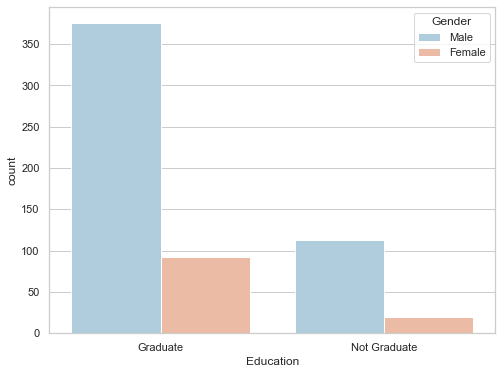

In [27]:
sns.set_style("whitegrid")
sns.countplot(x="Education", hue='Gender',data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Gender', ylabel='count'>

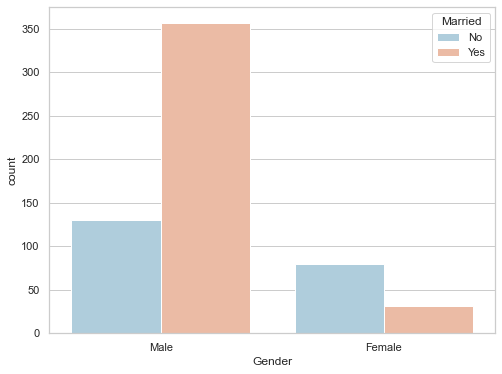

In [28]:
sns.set_style("whitegrid")
sns.countplot(x="Gender",hue='Married', data=df, palette='RdBu_r')

### Building pipeline/model 

In [29]:
df['Loan_Status'].replace(to_replace=['Y','N'],value=[1,0], inplace=True) 

#### Replacing the Loan_Status column values to be numeric is essential

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


First, we need to identify the categorical and numerical columns

In [31]:
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
numeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

Setting the X data and target variable. Train-test split.

In [32]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [34]:
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is', y_test.shape)

Shape of X_train is: (429, 11)
Shape of X_test is: (185, 11)
Shape of y_train is (429,)
Shape of y_test is (185,)


#### Missing Value Imputation

In [35]:
X_train.isna().sum()

Gender               11
Married               1
Dependents           11
Education             0
Self_Employed        18
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     11
Credit_History       32
Property_Area         0
dtype: int64

In [36]:
Imputer_cat = SimpleImputer(strategy='most_frequent')
Imputer_num = SimpleImputer(strategy='median')

X_train[categorical] = Imputer_cat.fit_transform(X_train[categorical])
X_train[numeric] = Imputer_num.fit_transform(X_train[numeric])

In [37]:
X_train.isna().sum()   #looks fine, now we can implement Outlier Detection method.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Outlier Detection (Isolation Forest)

I will try to implement and remove outliers from X_train.

In [38]:
iso = IsolationForest(contamination=0.1)
outlier_pred = iso.fit_predict(X_train[numeric])

In [39]:
mask = outlier_pred != -1

X_train_iso, y_train_iso = X_train.iloc[mask, :], y_train[mask]
 # Outliers are detected and filtered out.

In [40]:
X_train_iso.shape

(386, 11)

In [41]:
X_train.shape

(429, 11)

<B>Testing Pipeline with X_train and y_train without Outlier detection.

In [42]:
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



<B>Testing X_train_iso, y_train_iso with Ourlier detected(ISO) and filtered out.

In [43]:
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train_iso, y_train_iso)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



To sum up, we can see there is almost no change on the outcome of the model in case of Logistic Regression. Therefore for the other algorithms I will use X_train, y_train without Outlier Detection. Instead, I will use Scaler (Standard Scaler, Robust Scaler) and imputation techniques.

### Pipeline

In [44]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

#defining X and y again in order to start implementing whole Pipeline with gridsearchCV.

In [45]:
#Pipeline
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', GaussianNB())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.45      0.59        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.71      0.72       185
weighted avg       0.80      0.78      0.76       185



In [46]:
HTML(estimator_html_repr(model_pipeline))

In [47]:
model_pipeline.get_params() #the steps here will help us to setup our GridSearchCV 

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['ApplicantIncome', 'CoapplicantIncome',
                                     'LoanAmount', 'Loan_Amount_Term']),
                                   ('categorical',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one_hot_encoding',
                                                     OneHotEncoder())]),
                                    ['Gender', 'Married', 'Dependents',
                                     'Education', 'Self_Employed',
                            

In [48]:
param_space={
    'preprocessing__numeric__impute':[SimpleImputer(strategy='median'),SimpleImputer(strategy='mean')], 
    'classifier':[GaussianNB(),LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()],
    'preprocessing__numeric__scaler': [StandardScaler(),MinMaxScaler(),RobustScaler()]
}

In [49]:
gridsearch=GridSearchCV(model_pipeline, param_space, cv=5)

In [50]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                

In [51]:
gridsearch.best_params_

{'classifier': LogisticRegression(),
 'preprocessing__numeric__impute': SimpleImputer(strategy='median'),
 'preprocessing__numeric__scaler': StandardScaler()}

In [52]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                              

In [53]:
print(classification_report(y_test, gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



In [54]:
gridsearch.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

Roc and AUC curve will be used to evaluate the models.

In [55]:
#Roc Auc curve
# adding isolation forest to gridsearch

In [56]:
prediction = gridsearch.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction)

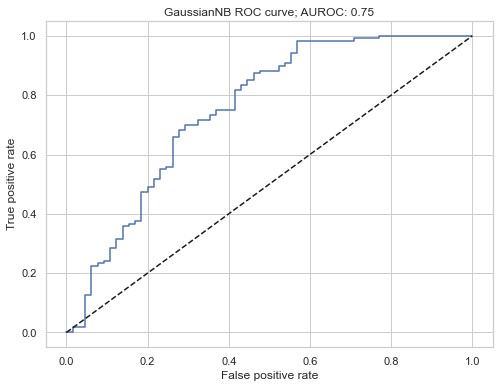

In [57]:
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, prediction), 2)

plt.title(f'GaussianNB ROC curve; AUROC: {AUROC}');

plt.show()

## <font size="5"> Logistic Regression

In [58]:
#Pipeline
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



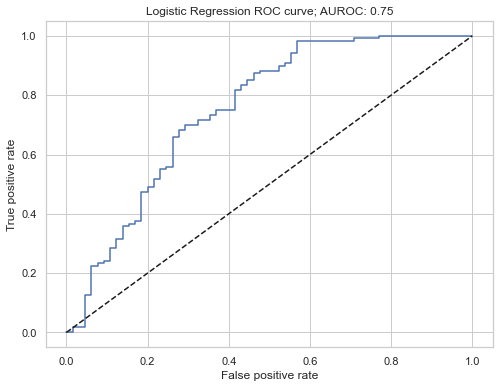

In [59]:
prediction = model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, prediction), 2)

plt.title(f'Logistic Regression ROC curve; AUROC: {AUROC}');

plt.show()

## <font size="5"> Decision Tree Classifier

In [60]:
#Pipeline
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', DecisionTreeClassifier())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56        65
           1       0.76      0.86      0.80       120

    accuracy                           0.73       185
   macro avg       0.71      0.68      0.68       185
weighted avg       0.72      0.73      0.72       185



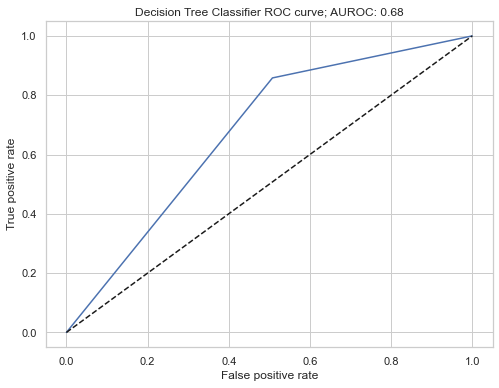

In [61]:
prediction =model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, prediction), 2)

plt.title(f'Decision Tree Classifier ROC curve; AUROC: {AUROC}');

plt.show()

## <font size="5"> KNN Classifier

In [62]:
#Pipeline
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', KNeighborsClassifier())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.32      0.47        65
           1       0.72      0.97      0.83       120

    accuracy                           0.74       185
   macro avg       0.78      0.64      0.65       185
weighted avg       0.77      0.74      0.70       185



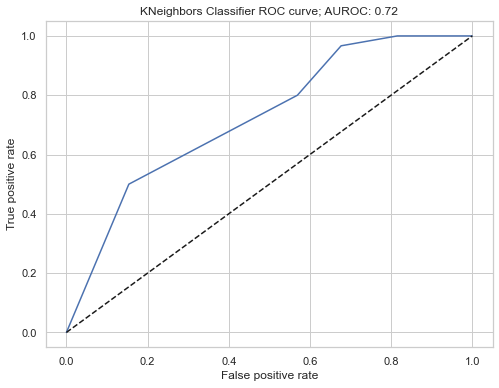

In [63]:
prediction =model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, prediction), 2)

plt.title(f'KNeighbors Classifier ROC curve; AUROC: {AUROC}');

plt.show()

## <font size="5"> Naive Bayes

In [64]:
#Pipeline
categorical_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('one_hot_encoding', OneHotEncoder())
])

numeric_transformer=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric),
    ('categorical', categorical_transformer, categorical)
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('classifier', GaussianNB())
])

model_pipeline.fit(X_train, y_train)
print(classification_report(y_test, model_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.45      0.59        65
           1       0.76      0.97      0.85       120

    accuracy                           0.78       185
   macro avg       0.82      0.71      0.72       185
weighted avg       0.80      0.78      0.76       185



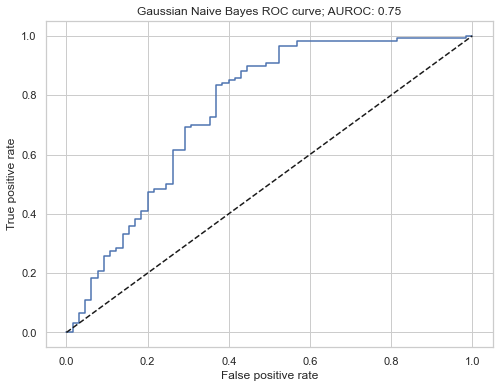

In [65]:
prediction =model_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, prediction), 2)

plt.title(f'Gaussian Naive Bayes ROC curve; AUROC: {AUROC}');

plt.show()

**To conclude, our model predicts precision very well in contrast to recall. In case of Credit Risk problem, having higher 
precision score is much more important for us than having higher recall score. Because, we need to avoid False Positives as 
it can cost us much more than False Negative. Overall, we can say our model works well, but still it can be imporved.**